# Recreating ThinkDSP with Librosa

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
y, sr = librosa.load(librosa.util.example_audio_file(), duration = 10)

In [42]:
import IPython.display as ipd
ipd.Audio(y, rate=sr)

# Standard waveform @ Different sampling rates

Amplitude envelope

In [28]:
librosa.get_duration(y, sr) 

33.052878048780485

In [34]:
y.shape[0] / 256 # rmse

5293.625

# Total energy of signal i.e. how loud it is

Hints:

We can strip out leading white spaces



In [30]:
librosa.feature.rmse(y, frame_length = 512, hop_length = 256, center = True).shape

(1, 5294)

In [ ]:
t = lib

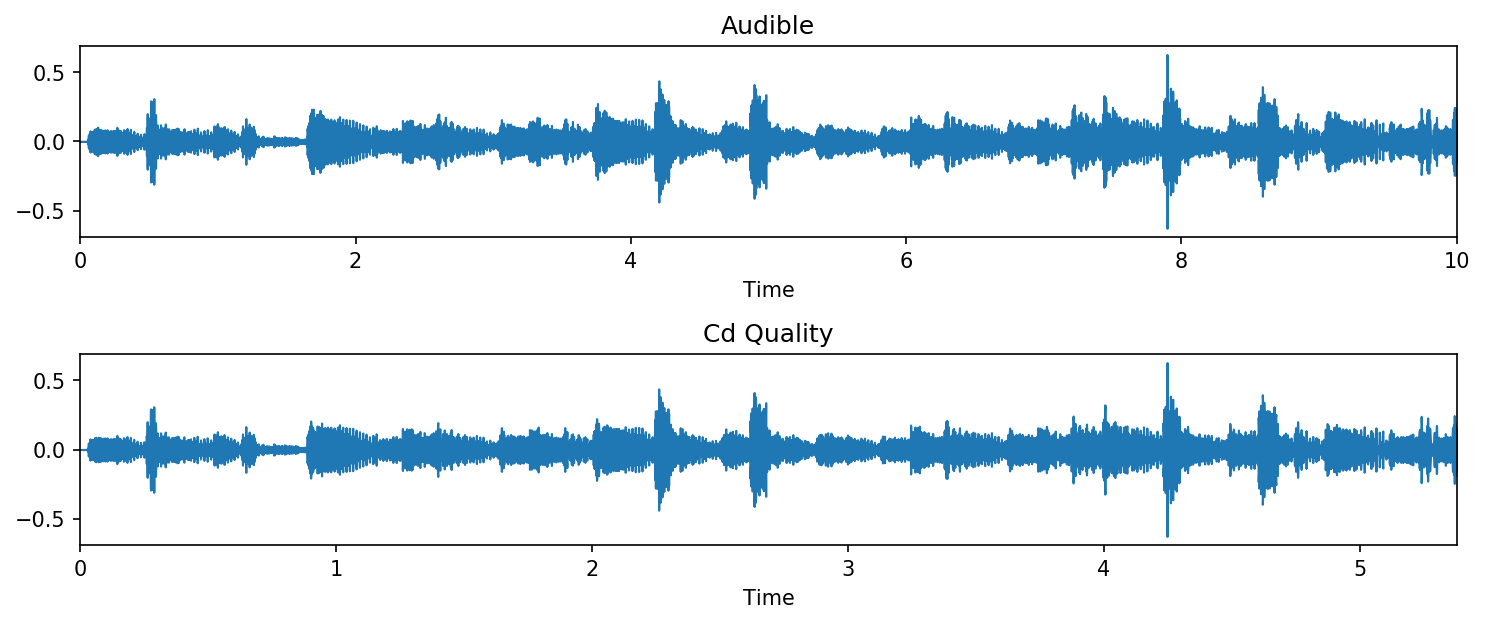

In [51]:
sampling_rates = [22050, 41000]
corresponding_quality = ['Audible', 'CD Quality']
# use_tracks = [y,y, y *]

fig = plt.figure(figsize=(10, 10), dpi=150) 
for sr, qual in zip(sampling_rates, corresponding_quality):
    plt.subplot(5,1, sampling_rates.index(sr) + 1)
    plt.title(qual.title())
    librosa.display.waveplot(y, sr = sr)

plt.tight_layout()

# Zero crossings

In [35]:
zero_crossings = librosa.zero_crossings(y, pad=False)


# zcrs = librosa.feature.zero_crossing_rate(x)

# might see high zero crossing rate at beginning, silence oscillates quitely around 0 

In [38]:
sum(zero_crossings)

32458

# Read sounds!

In [82]:
import glob

path = '/Users/BhavishDaswani/Downloads/2126__erh__atmospheres-and-soundscapes-2'
contents = glob.glob(path +'/*.wav')
print ('{} sounds available'.format(len(contents)))

51 sounds available


# FFT
It transforms our time-domain signal into the frequency domain. Whereas the time domain expresses our signal as a sequence of samples, the frequency domain expresses our signal as a superposition of sinusoids of varying magnitudes, frequencies, and phase offsets.

In [44]:
import scipy
import numpy as np


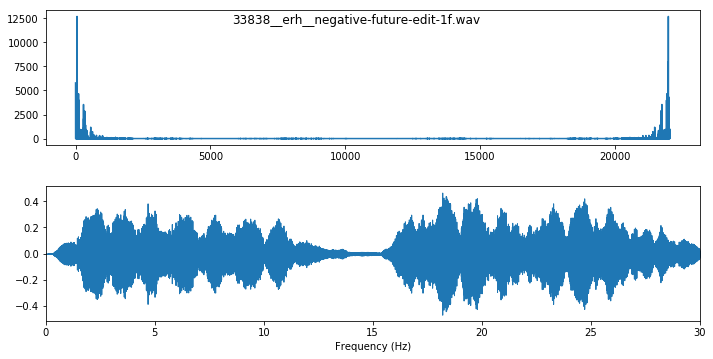

In [141]:
def fft_helper(y):
    y = scipy.fft(y)
    X_mag = np.abs(y)
    f= np.linspace(0, sr, len(X_mag)) # our x axis 
    return (f, X_mag)

ix = 5
fn = contents[ix]
y, sr = librosa.load(fn, sr = 22050, duration = 30, mono = True)
plt.figure(figsize=(10,12))
plt.subplot(5,1,1)
plt.plot(*fft_helper(y))
plt.subplot(5,1,2)
librosa.display.waveplot(y, sr = sr)
plt.xlabel('Frequency (Hz)')
plt.suptitle(fn.split('/')[-1])
plt.tight_layout()


# STFT

The short-time Fourier transform (STFT) (Wikipedia; FMP, p. 53) is obtained by computing the Fourier transform for successive frames in a signal.

In [3]:
import os
# get_size = lambda f: (os.stat(f).st_size, f)
# contents_by_file_size = list(map(get_size, contents))
# largest = max(contents_by_file_size, key = lambda x: x[0])[1]
x,sr = librosa.load('little_wing.wav')

In [5]:
print ('Duration in minutes : {}'.format(librosa.get_duration(x, sr) / 60))
hop_length = 512 # our windows
n_fft = 2048 # size of fft
X = librosa.stft(x, n_fft = n_fft, hop_length=hop_length)
print ('Hop length in seconds: {}'.format(float(hop_length) / sr))
print ('Frame size in seconds : {}'.format(float(n_fft) / sr))
X.shape   # 1025 frequency bins, 8191 frames
# This STFT has 1025 frequency bins and 9813 frames in time.

Duration in minutes : 3.8076855631141346
Hop length in seconds: 0.023219954648526078
Frame size in seconds : 0.09287981859410431


(1025, 9840)

# Spectogram

in music processing, we often only care about the spectral magnitude and not the phase content.

The human perception of sound intensity is logarithmic in nature. Therefore, we are often interested in the log amplitude:

In [10]:
S = librosa.amplitude_to_db(abs(X)) # converting STFT 
print (S.shape)

(1025, 9840)


array([[-35.38514, -35.38514, -35.38514, ..., -35.38514, -35.38514,
        -35.38514]], dtype=float32)

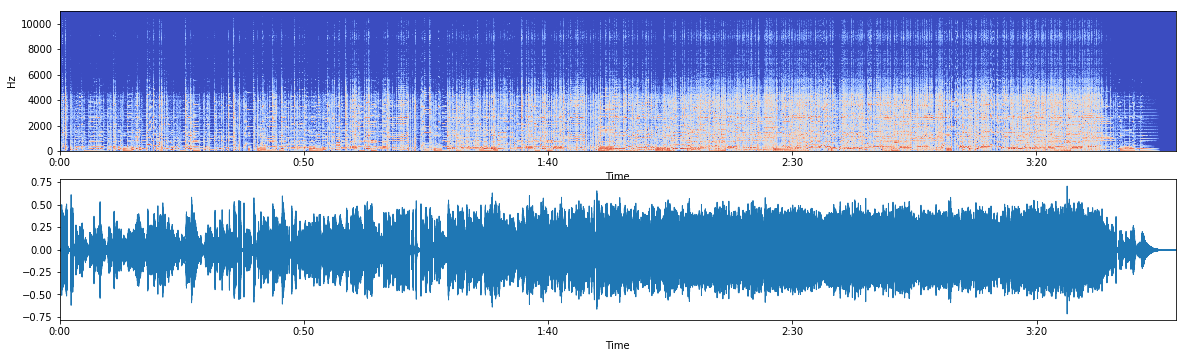

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(5,1,1)
librosa.display.specshow(S, sr = sr, x_axis = 'time', y_axis = 'linear')
plt.subplot(5,1,2)
librosa.display.waveplot(x)